In [ ]:
import numpy as np


def model(X, W, b):
	Z = X.dot(W) + b
	A = 1 / (1 + np.exp(-Z))
	return (A)

def cost(A, y):
	return 1/len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))

def gradients(A, X, y):
	dW = 1 / len(y) * np.dot(X.T, A - y)
	db = 1 / len(y) * np.sum(A - y)
	return (dW, db)

def update(dW, db, W, b, learning_rate):
	W = W - learning_rate * dW
	b = b - learning_rate * db
	return (W, b)


def artificial_neuron(X, y, W, b, learning_rate = 0.1, n_iteration = 100):
	history = []
	Loss = []
	
	for i in range(n_iteration):
		A = model(X, W, b)
		Loss.append(cost(A, y))
		dW, db = gradients(A, X, y)
		W, b = update(dW, db, W, b, learning_rate)
		history.append([W, b, Loss, i])
	return (W, b, Loss)


### Plant Neuron

Here we are use the neuron created in *neuron.ipynb* for know the toxicity of a plant.
1 = Toxic
0 = Safe

In [21]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score

from neuron import *

In [14]:
def init(X):
	W = np.random.randn(X.shape[1], 1)
	b = np.random.randn(1)
	return (W, b)

dimension de x :  (100, 2)
dimension de y :  (100, 1)


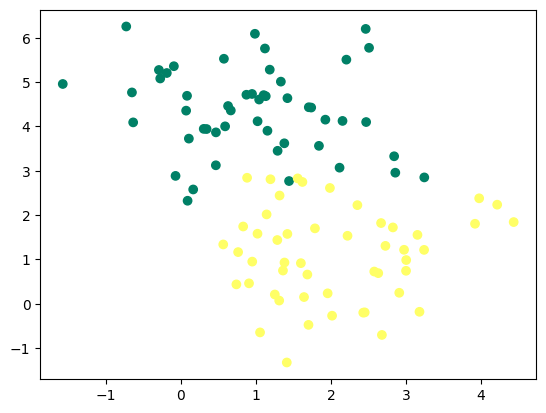

In [8]:
# Generate defaults plants and toxicity
x_plant, y_plant = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y_plant = y_plant.reshape((y_plant.shape[0], 1))
print('dimension de x : ', x_plant.shape)
print('dimension de y : ', y_plant.shape)

# Graphics
plt.scatter(x_plant[:,0], x_plant[:,1], c=y_plant, cmap='summer')
plt.show

W, b = init(x_plant)
A = model(x_plant, W, b)

In [19]:
def predict(X, W, b):
	A = model(X, W, b)
	print(A)
	return A >= 0.5

[[9.79490584e-01]
 [9.08459988e-01]
 [1.72264087e-03]
 [1.62521501e-01]
 [9.84762961e-01]
 [3.62441669e-01]
 [3.96061296e-02]
 [9.65510870e-01]
 [2.72766501e-02]
 [9.58110977e-01]
 [1.43548774e-02]
 [9.52624515e-01]
 [8.41314179e-03]
 [8.19820471e-03]
 [8.21728127e-01]
 [9.91471926e-01]
 [9.98054342e-01]
 [2.07027926e-02]
 [8.92122447e-01]
 [7.82618091e-01]
 [1.95102174e-02]
 [1.75043717e-02]
 [4.43870909e-01]
 [1.59675081e-03]
 [9.82990548e-01]
 [1.33515412e-02]
 [9.68232080e-01]
 [1.88314673e-03]
 [3.00900091e-02]
 [8.11118589e-01]
 [9.95008071e-01]
 [1.95411190e-02]
 [8.31507839e-01]
 [9.95085411e-01]
 [4.25215966e-01]
 [1.51019630e-01]
 [8.99051466e-01]
 [5.95058649e-01]
 [4.61787348e-01]
 [6.21764937e-01]
 [6.22547096e-02]
 [2.17422049e-02]
 [1.57067421e-04]
 [1.23639844e-01]
 [1.96854656e-01]
 [9.13015904e-01]
 [9.92311471e-01]
 [9.91589030e-01]
 [1.71246920e-03]
 [2.61737919e-03]
 [9.82123360e-01]
 [7.35048436e-01]
 [1.07577964e-02]
 [1.53516435e-02]
 [8.39486625e-01]
 [1.815913

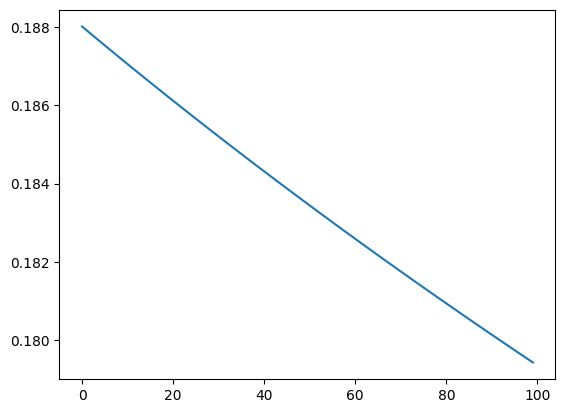

In [23]:
W, b, Loss = artificial_neuron(x_plant, y_plant, W, b)	
y_pred = predict(x_plant, W, b)
print(accuracy_score(y_plant, y_pred))

plt.plot(Loss)
plt.show()